### Q1. Generate a dataset using numpy random as I had shown in the 1st class of this week. Train a linear regression model  using |x-xhat|3 as your loss function and a polynomial regression model using |x-xhat|7 as your loss function. (Note that you will need to derive the gradient descent algorithms for these functions yourselves). You are allowed to use only numpy, pandas and Matplotlib. Then train a linear regression model using the sklearn library on the same dataset. At last, plot the dataset and curves obtained from all models in the same figure.


### |x - xhat|^3 loss using linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

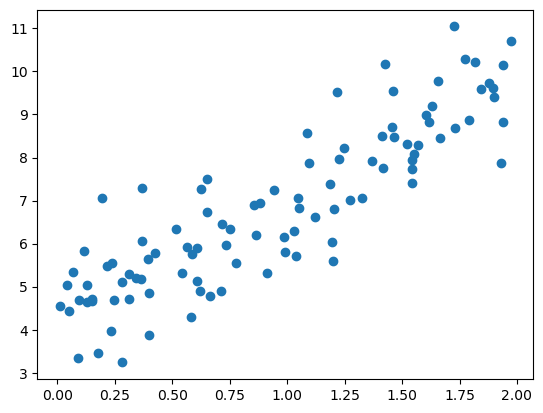

In [2]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
plt.scatter(x, y)
m=x.shape[0]

In [3]:
def cost(y_hat, y):
    """
    Calculate the cost using a custom loss function |y_hat - y|^3.

    Parameters:
    - y_hat: Predicted values.
    - y: Actual values.

    Returns:
    - cost: Mean of the cubed absolute differences between predicted and actual values.
    """
    # Calculate the cubed absolute differences
    loss = (np.abs(y_hat - y))**3
    
    # Calculate the mean of the cubed absolute differences
    cost = np.mean(loss)
    
    return cost

In [4]:
def hypothesis(x, w, b):
    """
    Calculate the hypothesis for linear regression: h(x) = wx + b.

    Parameters:
    - x: Input features.
    - w: Weight.
    - b: Bias term.

    Returns:
    - Hypothesis values.
    """
    # Calculate the hypothesis using the linear equation h(x) = wx + b
    # np.multiply is used for element-wise multiplication of x and w
    # This is equivalent to x * w in a simple linear regression equation
    hypothesis_values = np.multiply(x, w) + b
    
    return hypothesis_values

In [5]:
def gradient_descent(x, y, w, b, learning_rate, m):
    """
    Perform one step of gradient descent to update weights and bias.

    Parameters:
    - x: Input features.
    - y: Actual values.
    - w: Current weight.
    - b: Current bias term.
    - learning_rate: Learning rate for gradient descent.
    - m: Number of training examples.

    Returns:
    - Updated weight (w) and bias term (b).
    """
    # Calculate the hypothesis using the current weights and bias
    y_hat = hypothesis(x, w, b)
    
    # Calculate the gradient for weights (dw) using the derivative of the cost function with respect to weights
    dw = (3.0/m) * np.sum(np.multiply(x, ((y_hat - y)**2)))
    
    # Calculate the gradient for the bias term (db) using the derivative of the cost function with respect to bias
    db = (3.0/m) * np.sum((y_hat - y)**2)
    
    # Update weights using the learning rate and the calculated gradient
    w = w - learning_rate * dw
    
    # Update bias term using the learning rate and the calculated gradient
    b = b - learning_rate * db
    
    return w, b

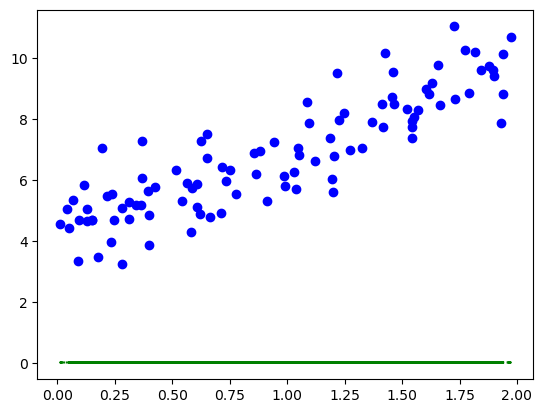

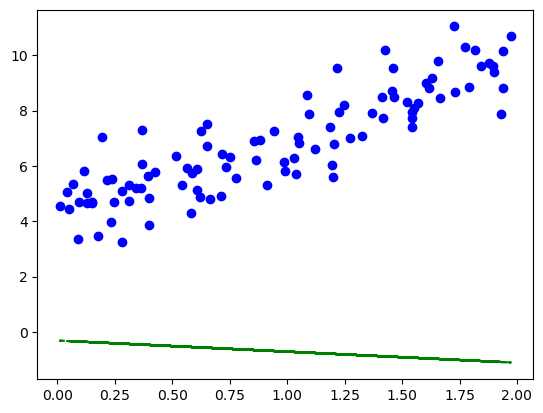

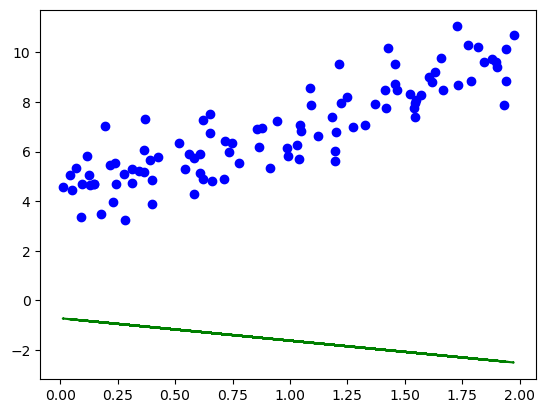

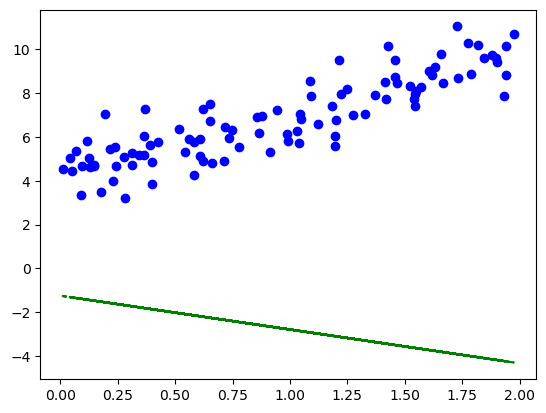

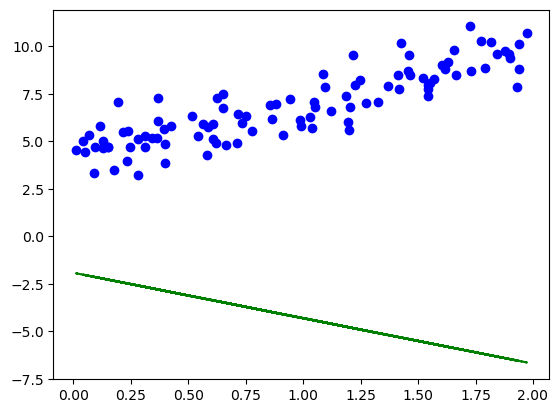

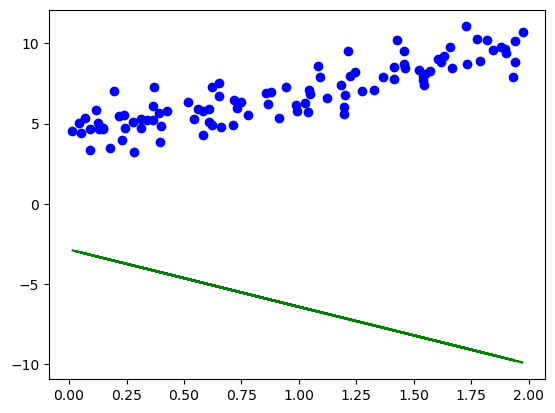

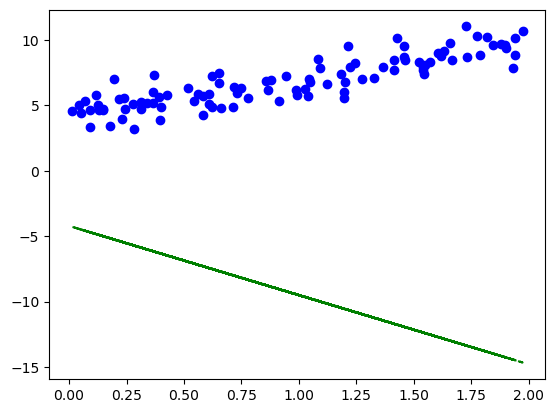

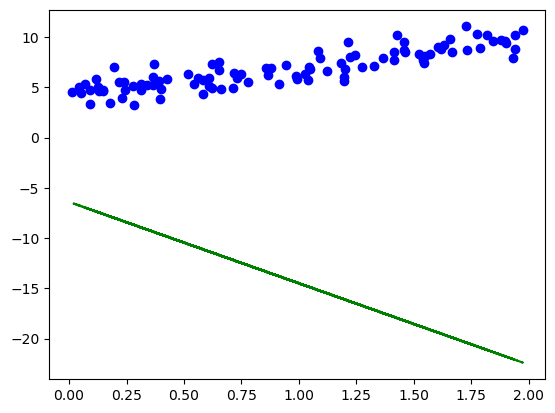

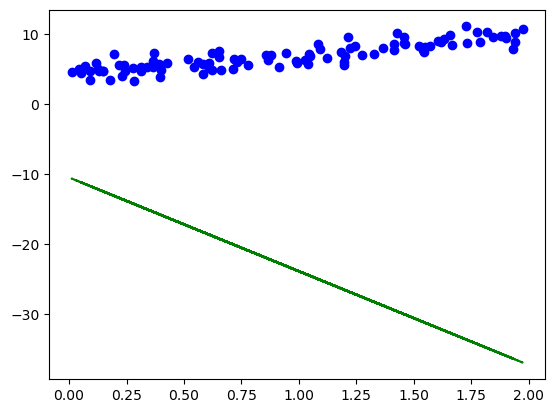

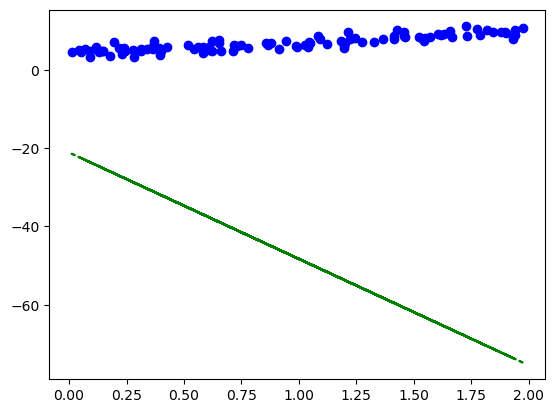

In [6]:
# Random Initialization
w = np.random.randn(1) * 0.01  # Random weight initialization with small values
b = np.random.randn(1) * 0.01  # Random bias term initialization with small values

# Hyperparameters
learning_rate = 0.0000002  # Learning rate for gradient descent
num_epochs = 100000  # Number of training epochs

# List to store the cost at each epoch for visualization
L = []

# Training loop
for i in range(num_epochs):
    # Perform one step of gradient descent to update weights and bias
    w, b = gradient_descent(x, y, w, b, learning_rate, m)
    
    # Calculate the hypothesis values using the updated weights and bias
    y_hat = hypothesis(x, w, b)
    
    # Calculate and store the cost for visualization
    L.append(cost(y_hat, y))
    
    # Visualization every 10% of epochs
    if (i % (num_epochs / 10)) == 0:
        # Plot the original data points in blue
        plt.plot(x, y, 'bo')
        
        # Plot the predicted values in green dashed line
        plt.plot(x, y_hat, 'g--')
        
        # Show the plot
        plt.show()

Obtained value of w: [-149.95707575]
Obtained value of b: [-114.95193058]
Obtained line: y=[-149.95707575]x+[-114.95193058]


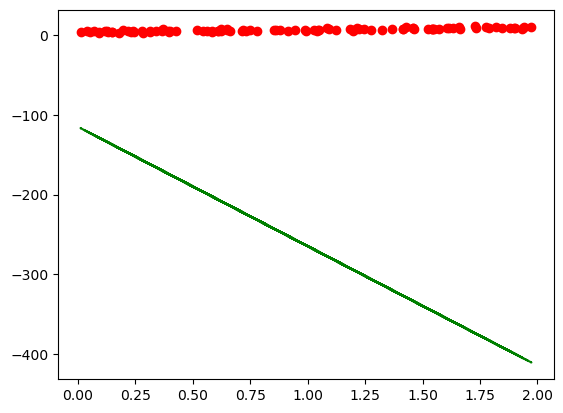

In [7]:
print(f"Obtained value of w: {w}")
print(f"Obtained value of b: {b}")
print(f"Obtained line: y={w}x+{b}")
plt.plot(x,y,'ro')
plt.plot(x,y_hat,'g--')
plt.show()

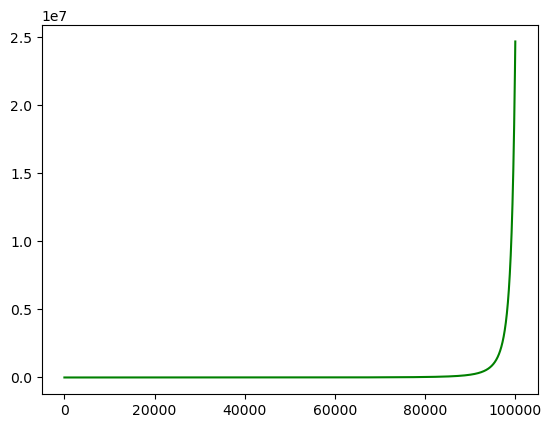

In [8]:
plt.plot(L,'g')
plt.show()

### |x - xhat|^7 loss using polynomial regression

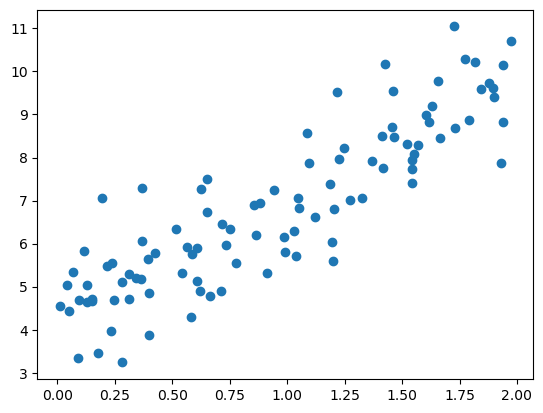

In [9]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
plt.scatter(x, y)
m=x.shape[0]

In [10]:
def cost(y_hat, y):
    l = (np.abs(y_hat-y))**7
    cost = np.mean(l)
    return cost

In [11]:
def hypothesis(x, w, b):
    return np.multiply(x, w) + b

In [12]:
def gradient_descent(x, y, w, b, learning_rate, m):
    y_hat = hypothesis(x, w, b)
    dw = (7.0/m) * np.sum(np.multiply(x,((y_hat - y)**6)))
    db = (7.0/m) * np.sum((y_hat - y)**6)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

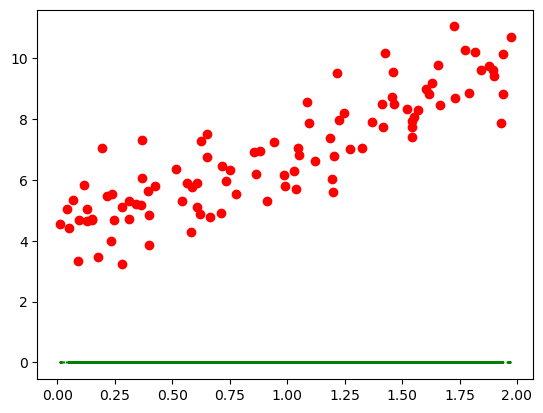

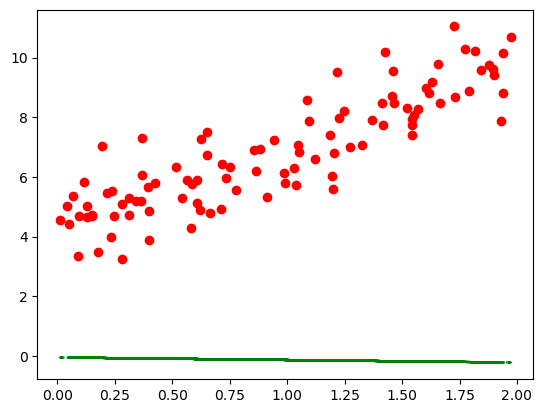

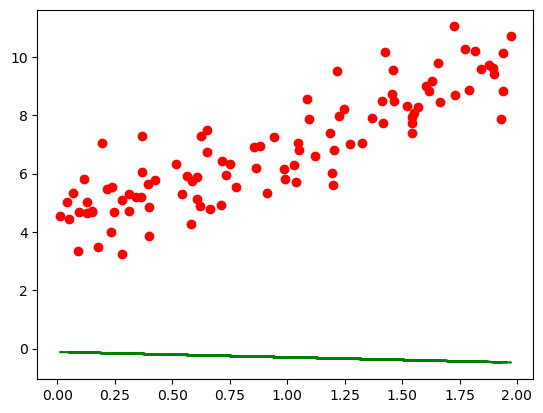

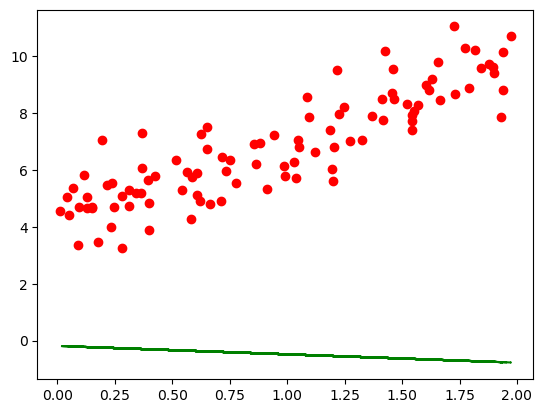

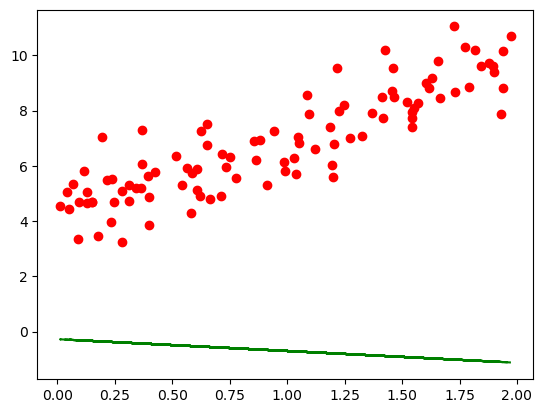

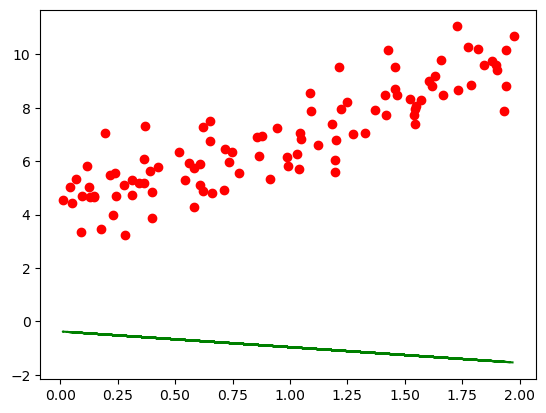

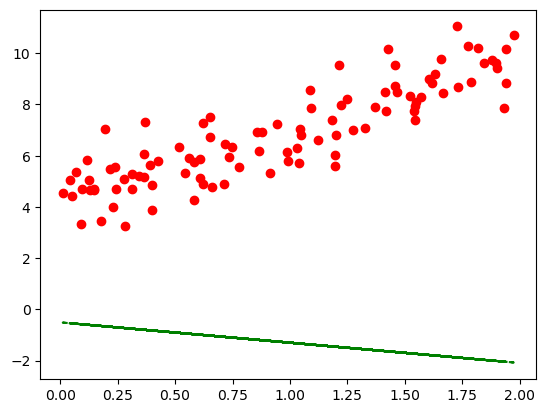

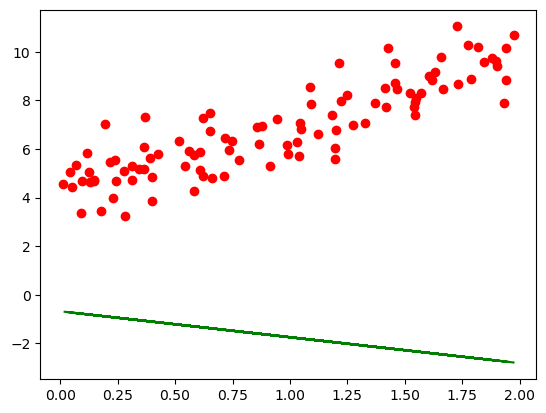

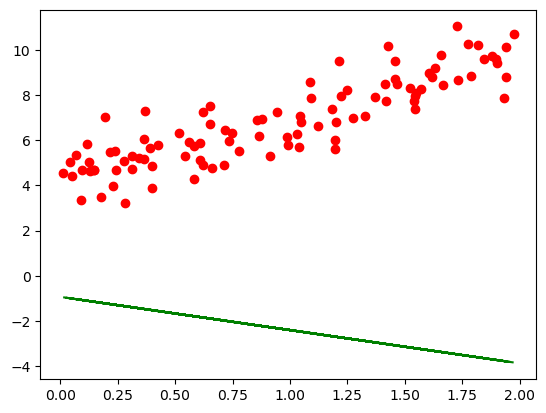

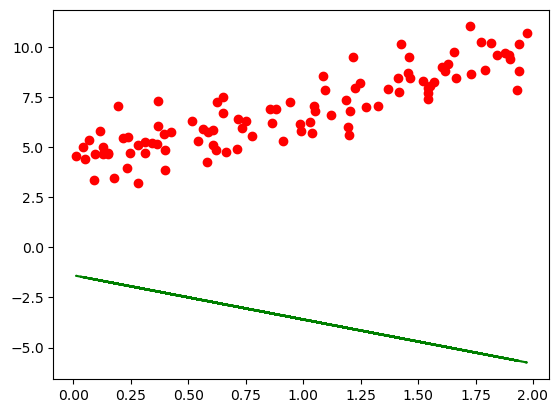

In [13]:
# Random Initialization with small values
w = np.random.randn(1) * 0.000001  # Random weight initialization with small values
b = np.random.randn(1) * 0.000001  # Random bias term initialization with small values

# Hyperparameters
learning_rate = 0.0000000000030  # Learning rate for gradient descent
num_epochs = 100000  # Number of training epochs

# List to store the cost at each epoch for visualization
L = []

# Training loop
for i in range(num_epochs):
    # Perform one step of gradient descent to update weights and bias
    w, b = gradient_descent(x, y, w, b, learning_rate, m)
    
    # Calculate the hypothesis values using the updated weights and bias
    y_hat = hypothesis(x, w, b)
    
    # Calculate and store the cost for visualization
    L.append(cost(y_hat, y))
    
    # Visualization every 10% of epochs
    if (i % (num_epochs / 10)) == 0:
        # Plot the original data points in blue
        plt.plot(x, y, 'ro')
        
        # Plot the predicted values in green dashed line
        plt.plot(x, y_hat, 'g--')
        
        # Show the plot
        plt.show()

Obtained value of w: [-5.33931747]
Obtained value of b: [-3.32183934]
Obtained line: y=[-5.33931747]x+[-3.32183934]


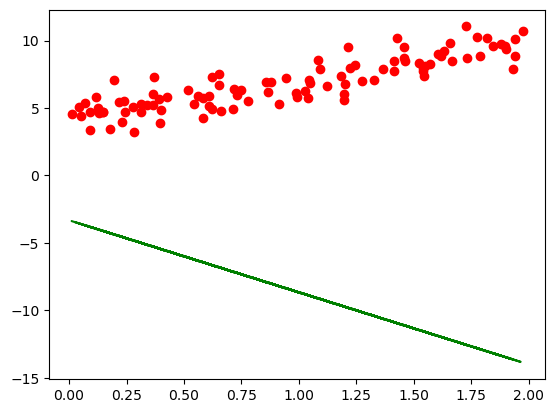

In [14]:
print(f"Obtained value of w: {w}")
print(f"Obtained value of b: {b}")
print(f"Obtained line: y={w}x+{b}")
plt.plot(x,y,'ro')
plt.plot(x,y_hat,'g--')
plt.show()

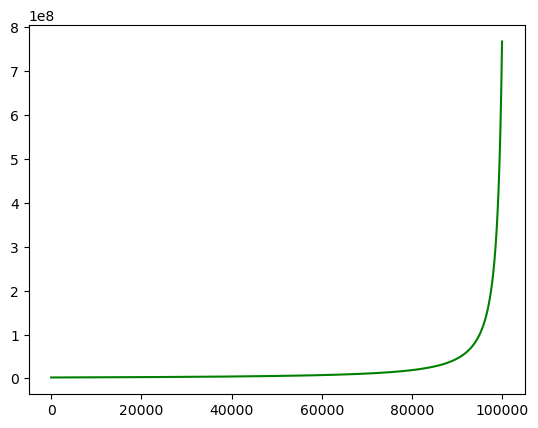

In [15]:
plt.plot(L,'g')
plt.show()





### Q2. Dataset: Air quality of an Italian city
### (https://archive.ics.uci.edu/ml/datasets/Air+quality)
### The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multi Sensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 values.

### Your objective is to predict the Relative Humidity of a given point of time based on all other attributes
### affecting the change in RH.

### (i) Perform the data pre-processing steps on the dataset as explained in the class. Handle missing values, get insights from correlation matrix and deal with outliers.

### (ii) Split the dataset into a 85:15 ratio into training and test dataset using the sklearn library.

### (iii) Train a linear regression model from scratch using only numpy, pandas and matplotlib and train a linear regression model using the sklearn library on the training dataset.

### (iv) Calculate the r2 score and mean squared error using the test dataset. Compare the results obtained and plot your results.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [18]:
col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

use = list(np.arange(len(col)))

df = pd.read_csv('AirQualityUCI.csv',sep = ';', header = None, skiprows = 1, names = col, na_filter = True,
                   na_values = -200, usecols = use)
df.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [19]:
df.dtypes

DATE             object
TIME             object
CO_GT            object
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT          object
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T                object
RH               object
AH               object
dtype: object

In [20]:
df.dropna(how='all', inplace=True)
df.dropna(thresh=10, axis=0, inplace=True)
df.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,NaN,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,NaN,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,NaN,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,NaN,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,NaN,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [21]:
df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0].split('.')[0]))

In [22]:
df['HOUR'].head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [23]:
print(df.shape[0] - df.count())

DATE               0
TIME               0
CO_GT           1557
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [24]:
df['DATE'] = pd.to_datetime(df.DATE, format='%d/%m/%Y')  

In [25]:
df.set_index('DATE', inplace=True)

In [26]:
df['MONTH'] = df.index.month     
df.reset_index(inplace = True)

In [27]:
df.isnull().sum()

DATE               0
TIME               0
CO_GT           1557
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
MONTH              0
dtype: int64

In [28]:
# NMHC_GT column is dropped because it has maximum null values
df.drop('NMHC_GT', axis = 1, inplace = True)    

In [29]:
# Convert 'CO_GT' to numeric
df['CO_GT'] = pd.to_numeric(df['CO_GT'], errors = 'coerce')

# Fill missing values in 'CO_GT' with the mean grouped by 'MONTH' and 'HOUR'
df['CO_GT'] = df['CO_GT'].fillna(df.groupby(['MONTH', 'HOUR'])['CO_GT'].transform('mean'))

# Fill missing values in 'NOX_GT' with the mean grouped by 'MONTH' and 'HOUR'
df['NOX_GT'] = df['NOX_GT'].fillna(df.groupby(['MONTH', 'HOUR'])['NOX_GT'].transform('mean'))

# Fill missing values in 'NO2_GT' with the mean grouped by 'MONTH' and 'HOUR'
df['NO2_GT'] = df['NO2_GT'].fillna(df.groupby(['MONTH', 'HOUR'])['NO2_GT'].transform('mean'))

In [30]:
print('The Remaining Missing Values:', df.shape[0] - df.count())

The Remaining Missing Values: DATE               0
TIME               0
CO_GT           2348
PT08_S1_CO         0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT           261
PT08_S3_NOX        0
NO2_GT           261
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
MONTH              0
dtype: int64


In [31]:
# Fill missing values in 'CO_GT' with the mean grouped by 'HOUR'
df['CO_GT'] = df['CO_GT'].fillna(df.groupby(['HOUR'])['CO_GT'].transform('mean'))

# Fill missing values in 'NOX_GT' with the mean grouped by 'HOUR'
df['NOX_GT'] = df['NOX_GT'].fillna(df.groupby(['HOUR'])['NOX_GT'].transform('mean'))

# Fill missing values in 'NO2_GT' with the mean grouped by 'HOUR'
df['NO2_GT'] = df['NO2_GT'].fillna(df.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [32]:
print(df.shape[0] - df.count())

DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   

In [34]:
col_2 = ['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC',
         'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH']

X = df[col_2].drop(columns='RH')
y = df['RH']

In [35]:
ss = StandardScaler()  

In [36]:
# List of non-numeric columns to exclude from standardization
non_numeric_columns = ['DATE', 'TIME']

# Identify numeric columns by excluding non-numeric columns
numeric_columns = [col for col in X.columns if col not in non_numeric_columns]

# Extract numeric columns from X
X_numeric = X[numeric_columns]

# Replace commas with dots for proper numeric conversion (assuming commas are used for decimal points)
X_numeric = X_numeric.replace(',', '.', regex=True)

# Convert the numeric columns to numeric values, coerce errors to NaN
X_numeric = X_numeric.apply(pd.to_numeric, errors='coerce')

# Standardize the numeric columns using StandardScaler
X_numeric_std = ss.fit_transform(X_numeric)

# Create a copy of the original X DataFrame for standardized data
X_std = X.copy()

# Replace the original numeric columns with the standardized values
X_std[numeric_columns] = X_numeric_std

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state = 42)

In [38]:
print("Training dataset size:",X_train.shape)
print("Test dataset size:",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Training dataset size: (7642, 13)
Test dataset size: (1349, 13)
(7642,)
(1349,)


In [39]:
X_train

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH
5026,2004-10-12,08.00.00,0.679764,0.009982,0.633191,0.756500,1.012608,-0.730107,-0.114130,0.397864,0.228614,-0.047311,0.370414
510,2004-04-01,00.00.00,-0.459167,0.198863,-0.507840,-0.427835,-0.709171,0.586077,-0.487812,0.059896,-0.112699,-0.715364,-0.411675
1061,2004-04-25,02.00.00,-1.028633,-0.777789,-0.870285,-0.937548,-0.876778,1.267533,-0.773570,-0.402281,-1.304782,-0.636104,-0.408703
6455,2004-12-10,21.00.00,1.533963,-1.049594,-0.279634,-0.146743,0.763738,0.321283,0.853049,-1.577944,-0.193007,-0.636104,-1.767330
5627,2004-11-06,09.00.00,-0.174434,0.516736,0.847973,0.943894,1.114188,-1.107828,-0.246018,0.374755,0.469540,-0.273769,0.563336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2004-11-10,20.00.00,1.533963,0.816181,1.519168,1.483591,1.779537,-1.107828,1.622396,0.519185,0.773207,-0.941823,-0.368336
5191,2004-10-19,05.00.00,-1.028633,-0.579695,-0.413873,-0.300406,-0.495854,-0.247246,-1.257159,-0.211633,-0.172930,-0.353030,0.573243
5390,2004-10-27,12.00.00,-0.174434,0.525950,0.901669,0.988869,1.063398,-0.994901,0.457385,0.816712,0.715485,0.269732,0.962554
860,2004-04-16,17.00.00,0.679764,2.271947,1.733950,1.644750,0.372655,-0.987113,0.743143,2.029927,1.069346,-0.420968,0.573986


In [40]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between true and predicted values.

    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.

    Returns:
    - Mean squared error.
    """
    return np.mean((y_true - y_pred)**2)

def gradient_descent(X, y, learning_rate, epochs):
    """
    Perform gradient descent to minimize the mean squared error.

    Parameters:
    - X: Input features.
    - y: Target values.
    - learning_rate: Learning rate for gradient descent.
    - epochs: Number of iterations.

    Returns:
    - w: Weights after optimization.
    - b: Bias term after optimization.
    """
    m, n = X.shape
    w = np.zeros((n, 1))  # Initialize weights as zeros
    b = 0  # Initialize bias term as zero

    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b  # Calculate predicted values

        dw = (2/m) * np.dot(X.T, (y_pred - y))  # Calculate gradient for weights
        db = (2/m) * np.sum(y_pred - y)  # Calculate gradient for bias term

        w = w - learning_rate * dw  # Update weights
        b = b - learning_rate * db  # Update bias term

        if epoch % 100 == 0:
            cost = np.mean((y_pred - y)**2)  # Calculate mean squared error as the cost
            print(f'Epoch {epoch}, Cost: {cost}')

    return w, b


In [41]:
learning_rate = 0.000001
epochs = 500

non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in X_train.columns if col not in non_numeric_columns]

X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

y_train = y_train.str.replace(',', '.')
y_train = y_train.astype(float)

X_train_with_bias = np.c_[np.ones(X_train_numeric.shape[0]), X_train_numeric]
X_test_with_bias = np.c_[np.ones(X_test_numeric.shape[0]), X_test_numeric]

y_train = y_train.values.flatten()

In [42]:
weights, bias = gradient_descent(X_train_with_bias, y_train, learning_rate, epochs)

y_pred_manual_gd = np.dot(X_test_with_bias, weights) + bias

Epoch 0, Cost: 2722.3868241298005
Epoch 100, Cost: 409.76407569140105
Epoch 200, Cost: 303.44947892911887
Epoch 300, Cost: 298.45338191723977
Epoch 400, Cost: 298.1100958064284


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_numeric = y_test.str.replace(',', '.').astype(float)
print(y_test_numeric.shape)

y_pred_manual_gd_reshaped = y_pred_manual_gd.reshape(-1, 1)

y_pred_manual_gd_reshaped = y_pred_manual_gd_reshaped[:1349, :]

rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_manual_gd_reshaped))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test_numeric, y_pred_manual_gd_reshaped)
print(f"R-squared: {r2}")

(1349,)
RMSE: 17.52155193800454
R-squared: -1.4148960714166492e-06


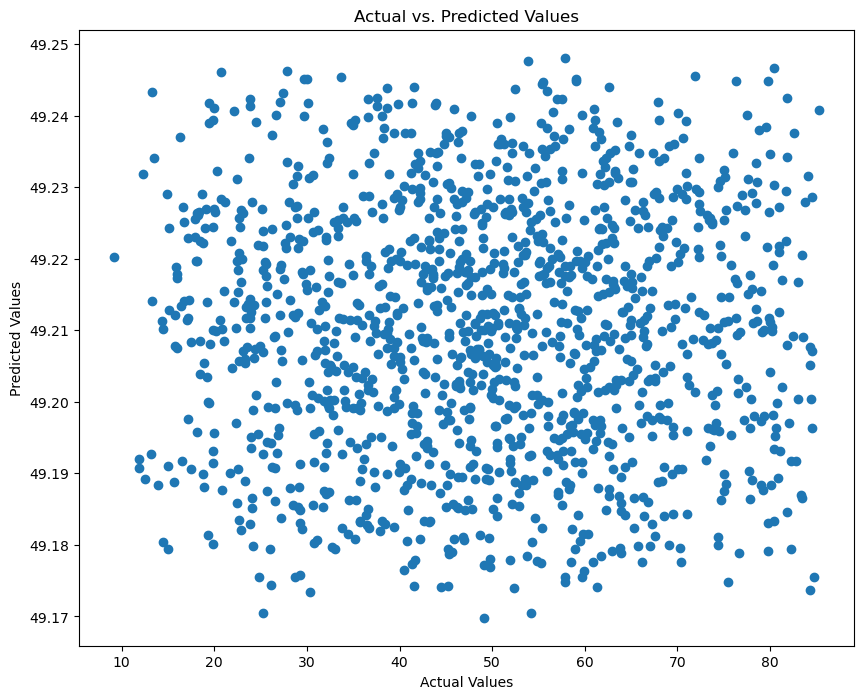

In [44]:
# Creating a scatter plot of Actual vs Predicted Values
plt.scatter(y_test_numeric, y_pred_manual_gd_reshaped)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()